In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data from GitHub
income_url = "https://raw.githubusercontent.com/datagus/ASDA2025/main/datasets/homework_week5/income.xlsx"
world_url  = "https://raw.githubusercontent.com/datagus/ASDA2025/main/datasets/homework_week5/world_bank_development_indicators.csv"

income = pd.read_excel(income_url, engine="openpyxl")
world  = pd.read_csv(world_url)

In [3]:
# Standardize Column Names
income.columns = income.columns.str.strip().str.lower().str.replace(" ", "_")
world.columns = world.columns.str.strip().str.lower().str.replace(" ", "_")


In [4]:
# Clean Income Dataset
income = income.drop_duplicates()

In [5]:
# Rename for consistency
income = income.rename(columns={"economy_code": "country_code", "economy": "country"})


In [6]:
# remove rows with no region or income group
income = income.dropna(subset=["region", "income_group"])

In [7]:
# Convert date to year only
world["date"] = pd.to_datetime(world["date"], errors="coerce")
world["year"] = world["date"].dt.year

In [8]:
# Remove rows without country name
world = world.dropna(subset=["country"])

In [9]:
# Remove negative land areas
if "land_area" in world.columns:
    world = world[world["land_area"].fillna(0) >= 0]


In [10]:
# Drop full duplicate rows
world = world.drop_duplicates()

In [11]:
# Standardize Country Names
world["country"] = world["country"].str.strip()
income["country"] = income["country"].str.strip()


In [12]:
# Merge Datasets
merged = world.merge(income, on="country", how="left")

In [13]:
#Check missing income groups
missing_income = merged[merged["income_group"].isna()]["country"].unique()

print("Countries with missing income classification:", missing_income)


Countries with missing income classification: ['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics' "Cote d'Ivoire"
 'Curacao' 'Czech Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)' 'Ethiopia' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (IDA & IBRD countries)'
 'Europe & Central Asia (IDA & IBRD)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countr

In [14]:
from IPython.display import display
display(merged)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,year,code,region,income_group,lending_category
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8622466.0,7898093.0,NaN,NaN,NaN,1960,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8790140.0,8026804.0,NaN,NaN,NaN,1961,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,8969047.0,8163985.0,NaN,NaN,NaN,1962,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9157465.0,8308019.0,NaN,NaN,NaN,1963,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,9355514.0,8458694.0,NaN,NaN,NaN,1964,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17267,Zimbabwe,2019-01-01,41.876696,45.213002,386850.0,657.0,6.927164,-1.271190,0.133336,46.682095,...,15354608.0,10408889.0,-1.163669,0.117815,5.145035,2019,ZWE,Sub-Saharan Africa,Lower middle income,Blend
17268,Zimbabwe,2020-01-01,41.876696,45.093912,386850.0,657.0,5.118949,-1.287992,0.140076,52.747667,...,15669666.0,10617452.0,-1.113408,0.120230,4.977770,2020,ZWE,Sub-Saharan Africa,Lower middle income,Blend
17269,Zimbabwe,2021-01-01,41.876696,44.974822,386850.0,NaN,NaN,-1.253550,0.151591,48.979927,...,15993524.0,10827136.0,-1.135830,0.120300,6.139985,2021,ZWE,Sub-Saharan Africa,Lower middle income,Blend
17270,Zimbabwe,2022-01-01,NaN,NaN,NaN,NaN,NaN,-1.255139,0.151262,NaN,...,16320537.0,11033499.0,-1.102206,0.119338,NaN,2022,ZWE,Sub-Saharan Africa,Lower middle income,Blend


In [15]:
df = merged.copy()
gov_cols = [
    "control_of_corruption_estimate",
    "goverment_effectiveness_estimate",   
    "rule_of_law_estimate",
    "voice_and_accountability_estimate",
    "political_stability_estimate",
    "regulatory_quality_estimate"
]


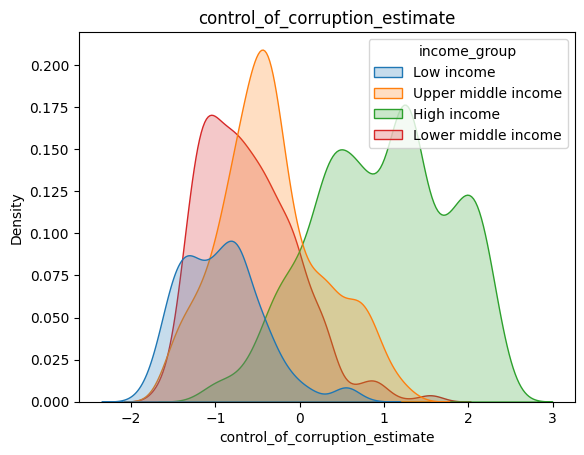

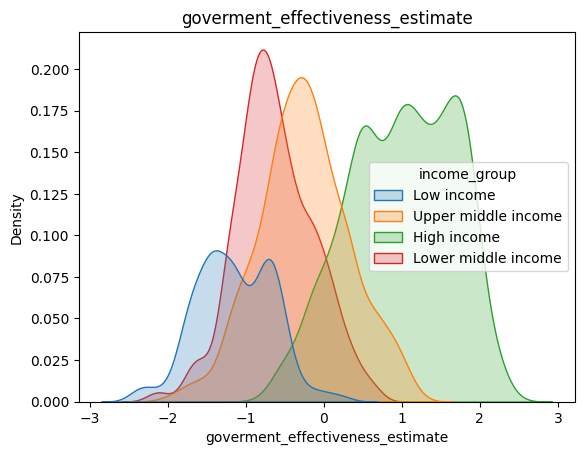

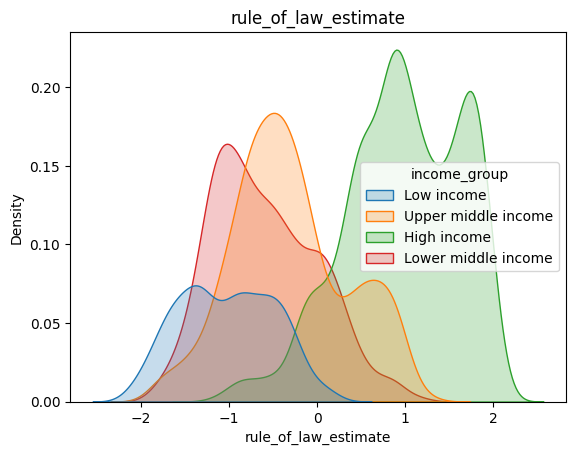

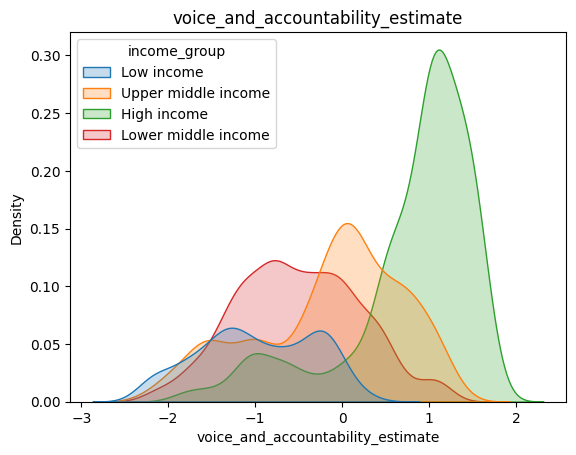

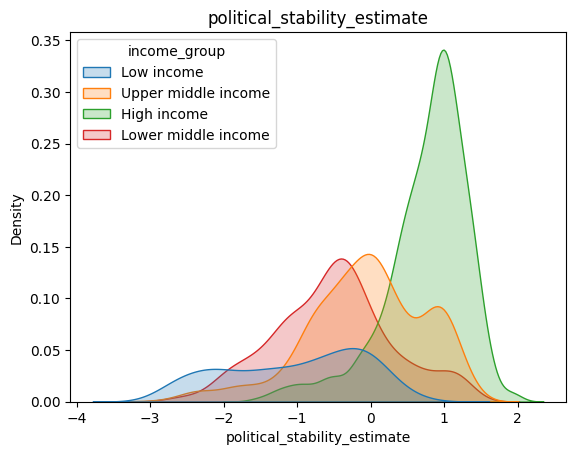

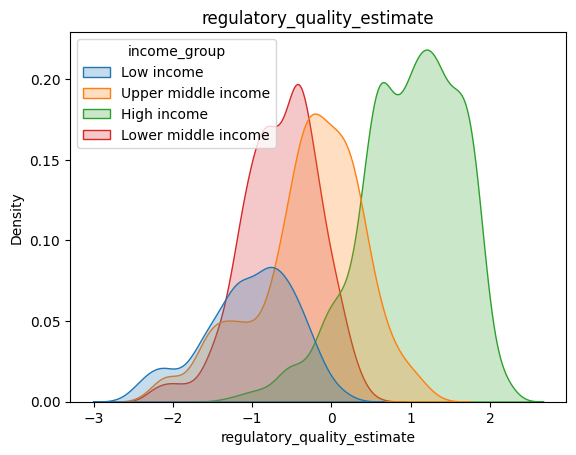

In [25]:
for col in gov_cols:
    sns.kdeplot(data=df, x=col, hue="income_group", fill=True)
    plt.title(col)
    plt.show()

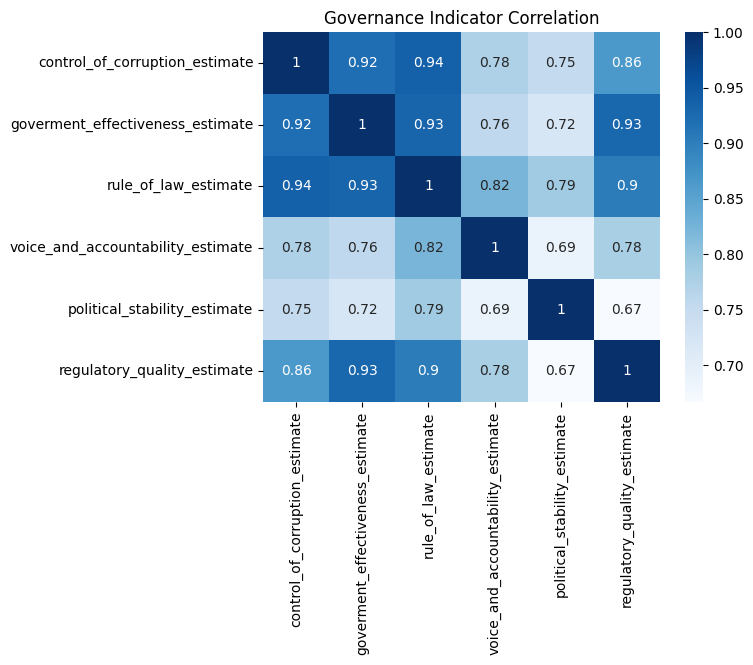

In [26]:
corr = df[gov_cols].corr()

sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Governance Indicator Correlation")
plt.show()


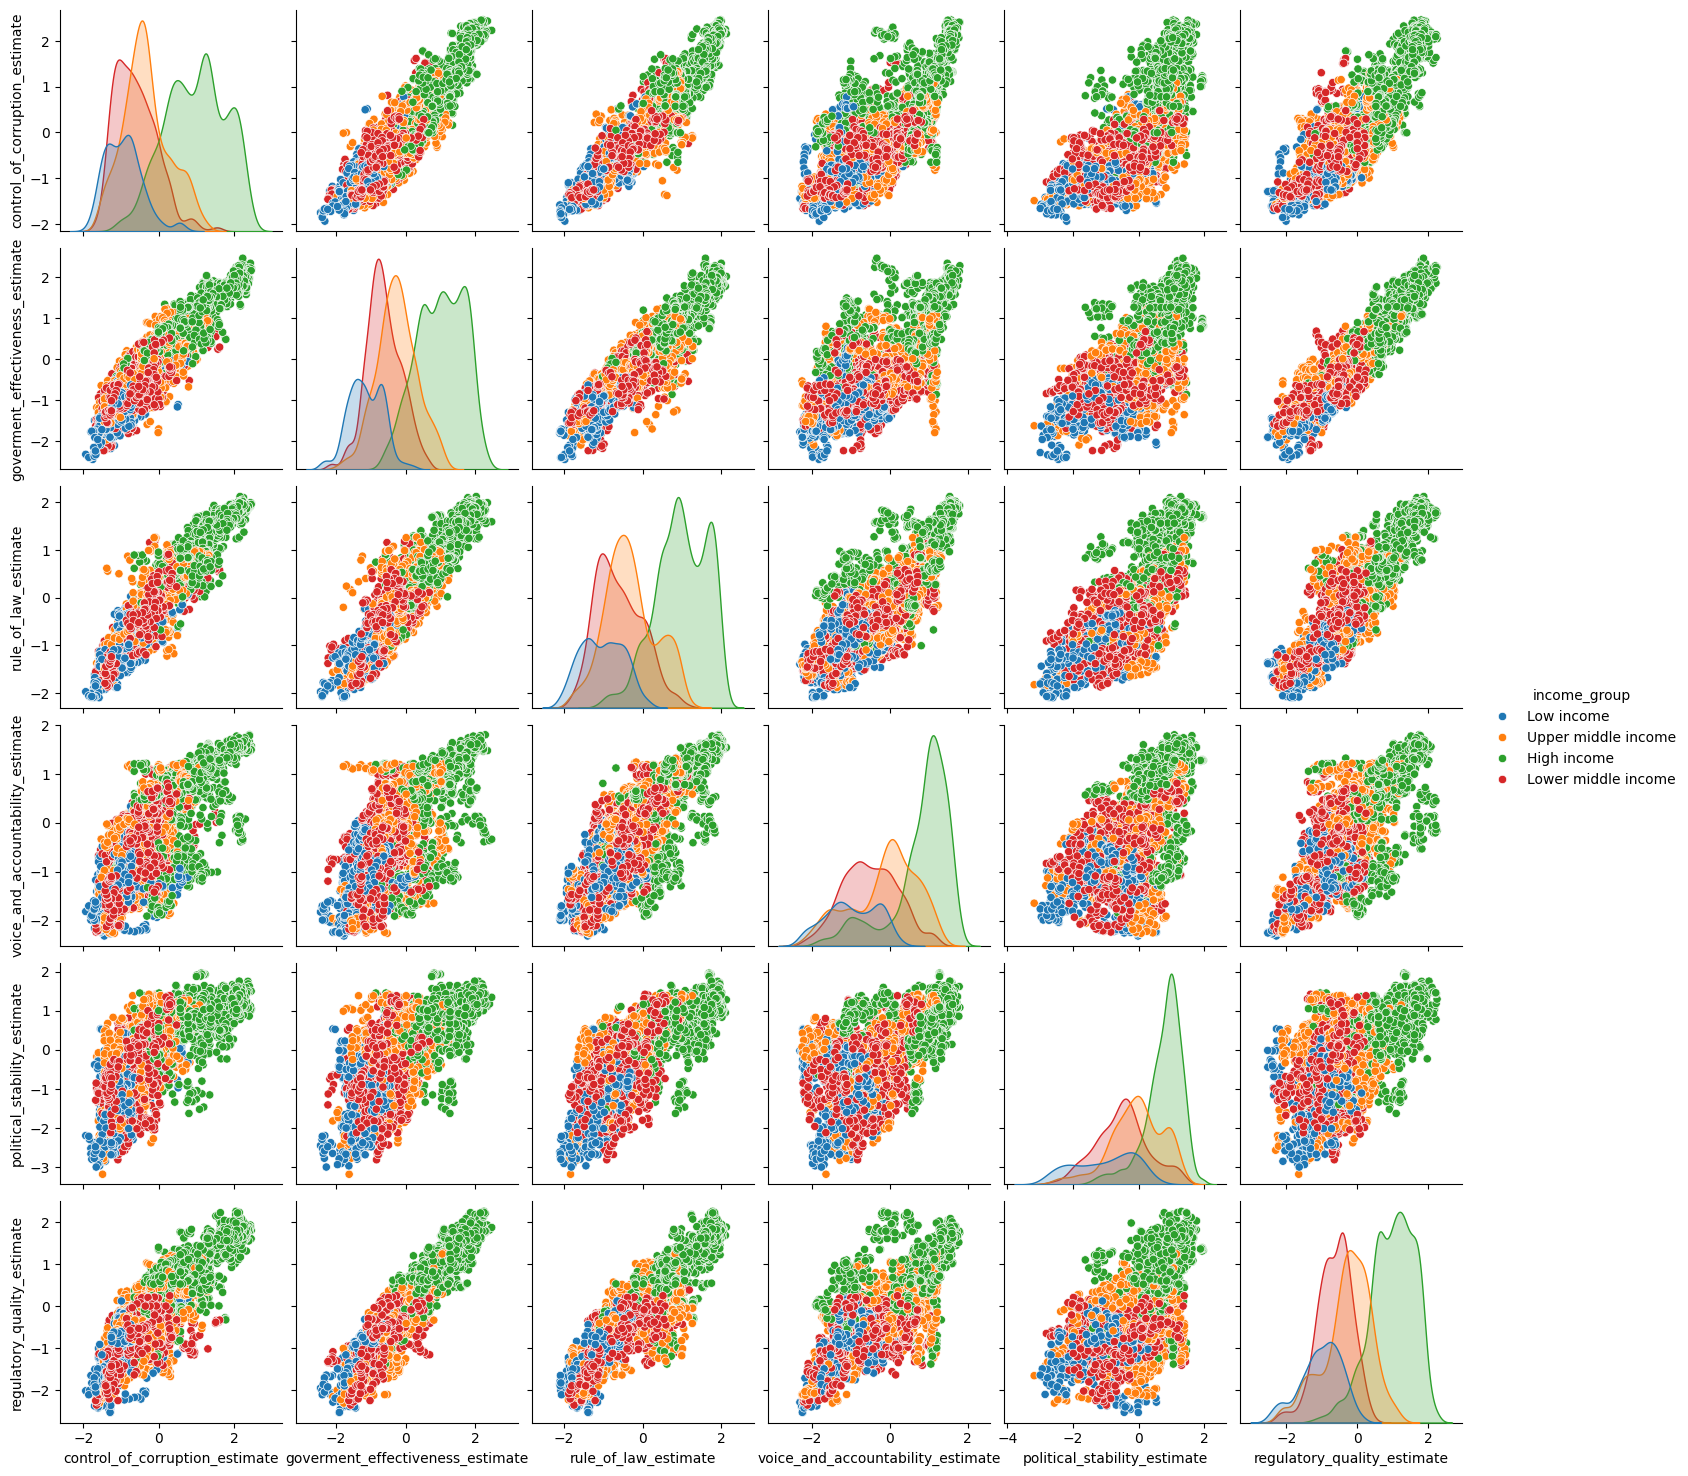

In [27]:
sns.pairplot(df[gov_cols + ["income_group"]], hue="income_group")
plt.show()


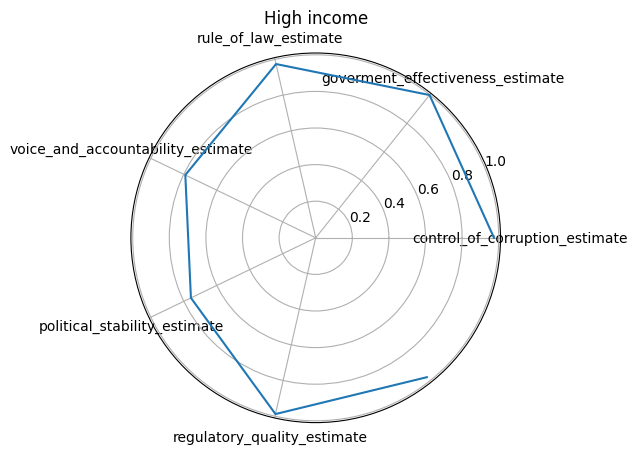

In [28]:
group = "High income"   

vals = df[df["income_group"] == group][gov_cols].mean().values
vals = np.append(vals, vals[0])

angles = np.linspace(0, 2*np.pi, len(vals), endpoint=False)

plt.polar(angles, vals)
plt.xticks(angles[:-1], gov_cols)
plt.title(group)
plt.show()

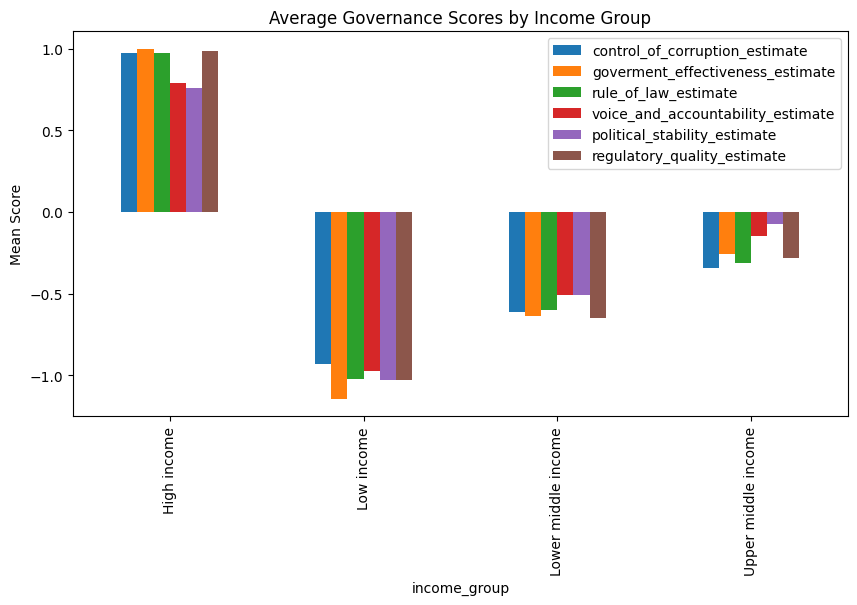

In [29]:
means = df.groupby("income_group")[gov_cols].mean()
means.plot(kind="bar", figsize=(10,5))
plt.title("Average Governance Scores by Income Group")
plt.ylabel("Mean Score")
plt.show()


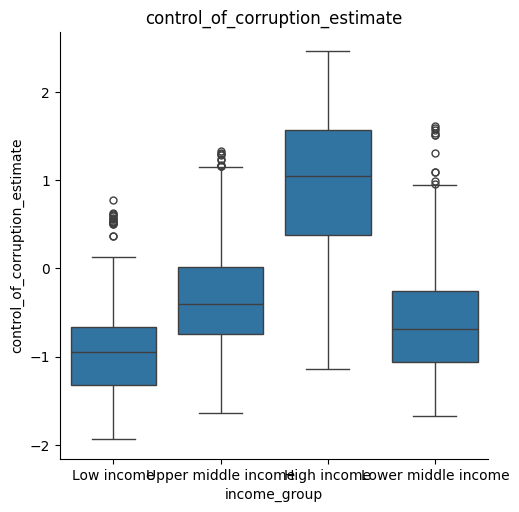

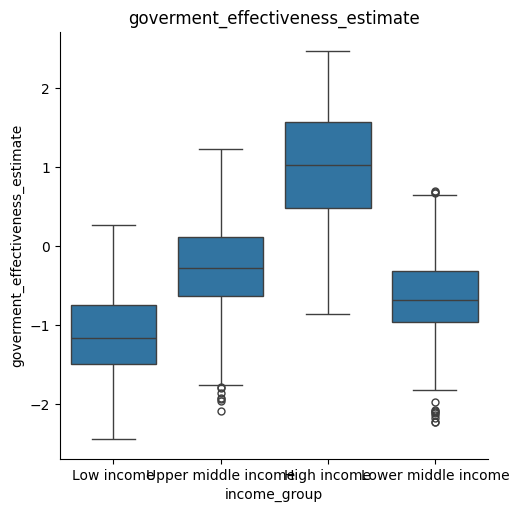

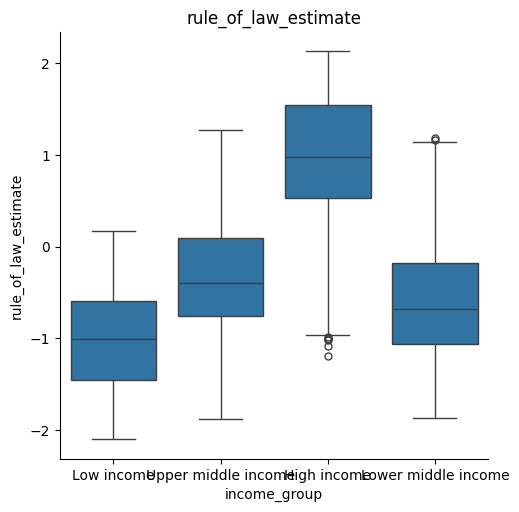

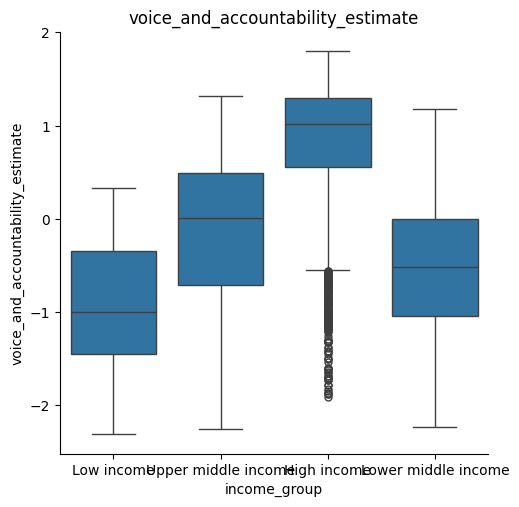

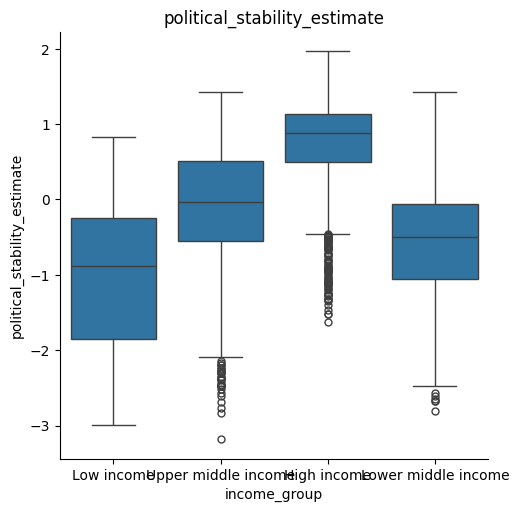

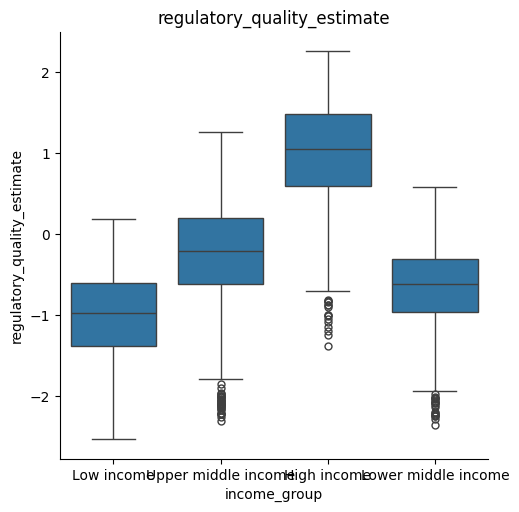

In [30]:
for col in gov_cols:
    sns.catplot(data=df, x="income_group", y=col, kind="box")
    plt.title(col)


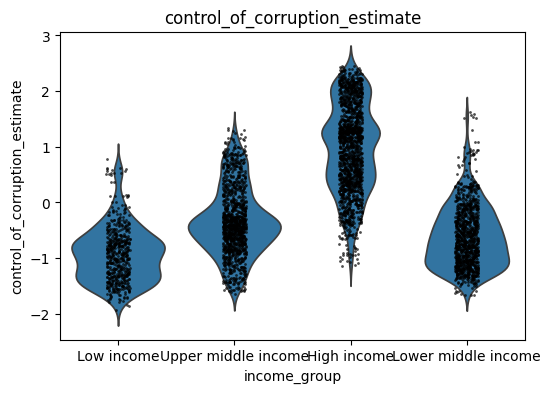

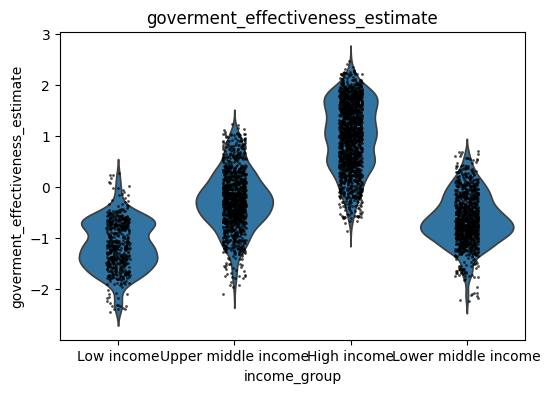

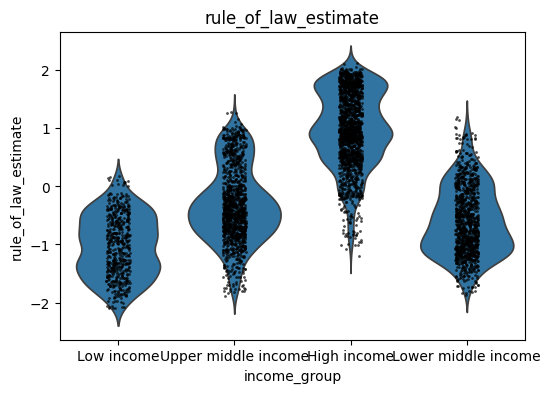

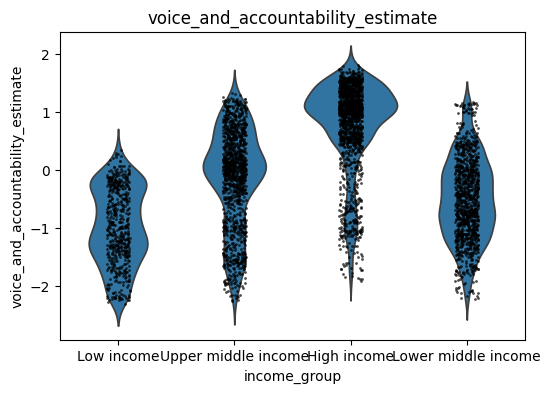

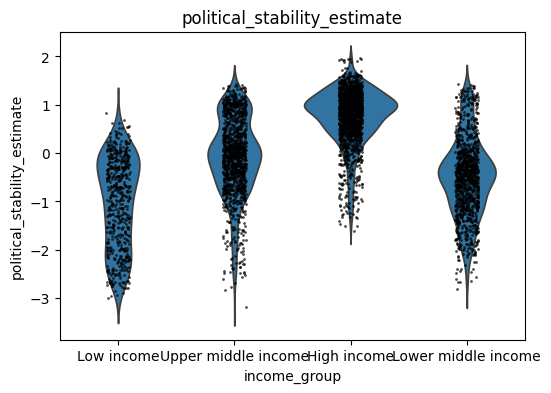

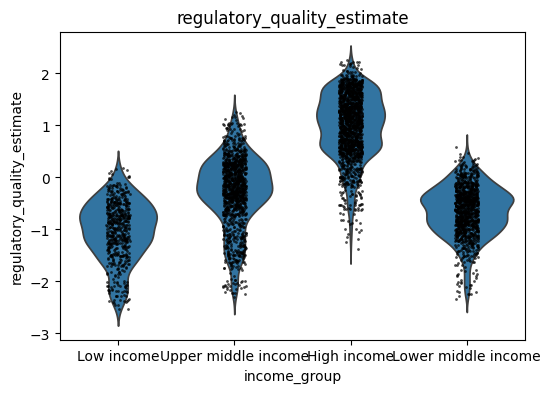

In [31]:
for col in gov_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x="income_group", y=col, inner=None)
    sns.stripplot(data=df, x="income_group", y=col, color="black", size=2, alpha=0.7)
    plt.title(col)
    plt.show()
